<a href="https://colab.research.google.com/github/PetrasCyberExpert/Codify/blob/main/Machine_Learning_Claasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Co

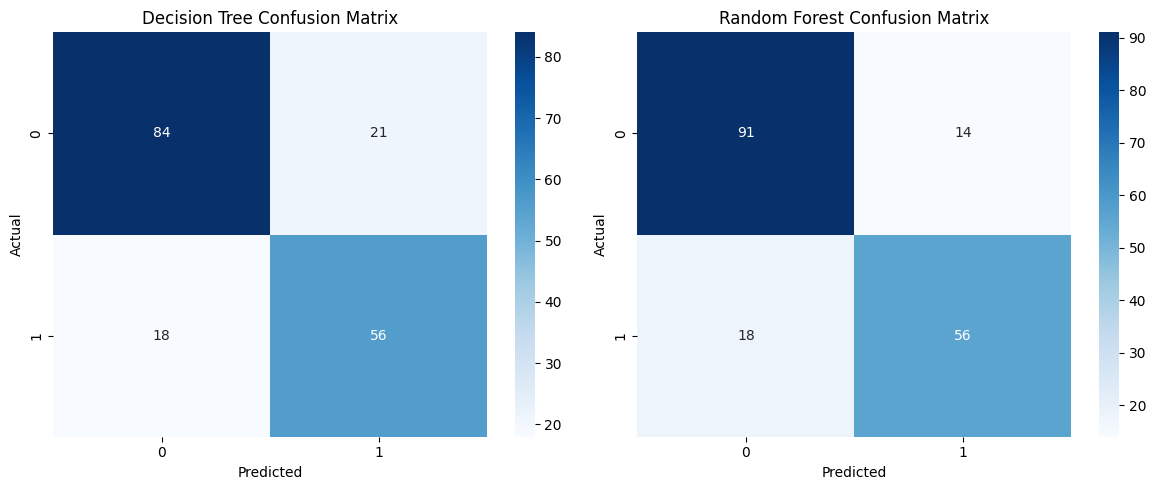

In [8]:
import pandas as pd
import numpy as np  # for numerical operations
from sklearn.model_selection import train_test_split  # for splitting the dataset
from sklearn.tree import DecisionTreeClassifier  # for decision tree model
from sklearn.ensemble import RandomForestClassifier  # for random forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc  # for evaluation metrics
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting

# Load dataset
df= pd.read_csv('/content/titanic-dataset/Titanic-Dataset.csv')

# Display the first few rows of the Titanic_Dataset
print(df.head())

# Check the column names
print("Column names:", df.columns)

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing ages with the median age
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing embarked with the mode

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Select relevant features
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
Y = df['Survived']  # Target variable

# Split the dataset into training and testing sets (80% training and 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Decision Tree model
# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize the decision tree model
dt_model.fit(X_train, Y_train)  # Train the model on the training dataset

# Make predictions on test set
dt_predictions = dt_model.predict(X_test)  # Predict survival

# Random Forest model
# Create and train the Random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the Random forest model with 100 trees
rf_model.fit(X_train, Y_train)  # Train the model on the training data

# Make predictions on test set
rf_predictions = rf_model.predict(X_test)  # Predict survival

# Evaluate Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_predictions)  # Calculate accuracy for Decision Tree
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(Y_test, dt_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(Y_test, dt_predictions))

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, rf_predictions)  # Calculate accuracy for random forest
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(Y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(Y_test, rf_predictions))

# Visualize the results
# Set up the matplotlib plot (figure)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Decision Tree model
sns.heatmap(confusion_matrix(Y_test, dt_predictions), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix for Random Forest model
sns.heatmap(confusion_matrix(Y_test, rf_predictions), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()  # Show the plot

In [6]:
!pip install  opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: petraskulyumba
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


100%|██████████| 22.0k/22.0k [00:00<00:00, 11.0MB/s]